In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=2acfe07937ac6d65969a1f4cdb6480cc506e7d7e20c2e04e747946fb0da1c644
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


#  Graph  Construction

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

G = nx.Graph()

# add nodes
num_nodes = 20  # 원하는 노드 수
for i in range(num_nodes):
    G.add_node(f"{i}")

# add edges (connect randomly)
num_edges = 30  # 원하는 엣지 수
for _ in range(num_edges):
    source = random.choice(list(G.nodes()))
    target = random.choice(list(G.nodes()))
    if source != target and not G.has_edge(source, target):
        G.add_edge(source, target)



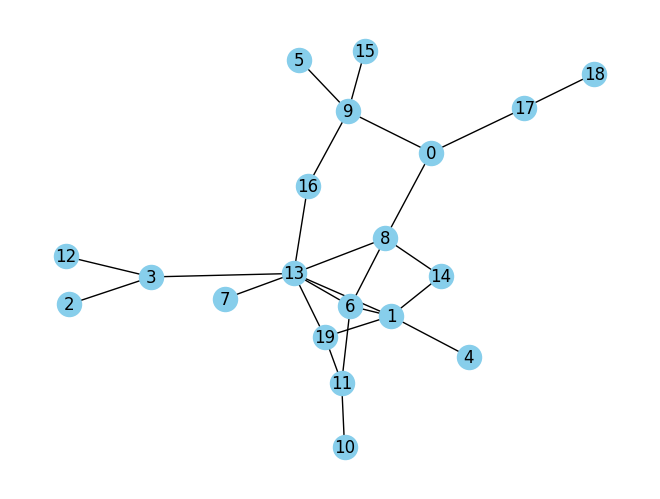

In [ ]:
# visualization
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=300, node_color="skyblue")
plt.show()

# Random Walk

In [ ]:
def random_walk(graph, start_node, num_steps):
    result = []
    current_node = start_node
    for _ in range(num_steps):
        result.append(current_node)
        neighbors = list(graph .neighbors(current_node))
        if not neighbors:
            break
        current_node = random.choice(neighbors)

    return result

In [ ]:
start_node = random.choice(list(G.nodes()))
num_steps = 10  # the number of steps for random walk (length of sequence)

print("Random Walk:")

result = random_walk(G, start_node, num_steps)
print(result)

Random Walk:
['5', '9', '16', '9', '5', '9', '0', '17', '18', '17']


# Deep Walk Code

In [ ]:
import numpy as np
import random
from gensim.models import Word2Vec
from torch.utils.data import Dataset
from functools import partial

In [ ]:
class RWDataset(Dataset):
    def __init__(self, graph: nx.Graph, data_size, num_steps):
        super().__init__()

        self.graph = graph
        self.data_size = data_size
        self.num_steps =  num_steps
    def __len__(self):
        return self.size

    def __getitem__(self,idx):
        start_node = list(self.graph.nodes)[idx]
        seq = random_walk(self.graph, start_node, self.num_steps)

        return seq

__building dataset__

In [ ]:
dataset = [seq for seq in RWDataset(graph=G, data_size=100, num_steps=10)]

In [ ]:
for seq in dataset:
    print(seq)

['0', '17', '18', '17', '18', '17', '18', '17', '18', '17']
['1', '13', '19', '1', '6', '8', '6', '13', '6', '8']
['2', '3', '13', '16', '13', '3', '2', '3', '13', '6']
['3', '2', '3', '12', '3', '13', '1', '14', '8', '13']
['4', '1', '19', '11', '10', '11', '19', '1', '6', '13']
['5', '9', '5', '9', '0', '9', '16', '13', '7', '13']
['6', '8', '14', '1', '13', '16', '13', '6', '13', '1']
['7', '13', '3', '2', '3', '13', '3', '12', '3', '2']
['8', '0', '9', '16', '13', '16', '9', '0', '17', '18']
['9', '16', '9', '15', '9', '5', '9', '15', '9', '16']
['10', '11', '19', '1', '14', '8', '6', '1', '13', '16']
['11', '6', '1', '13', '3', '13', '19', '13', '19', '1']
['12', '3', '13', '6', '11', '10', '11', '6', '11', '19']
['13', '1', '13', '3', '13', '8', '13', '19', '13', '19']
['14', '8', '13', '3', '2', '3', '12', '3', '13', '7']
['15', '9', '15', '9', '0', '9', '5', '9', '16', '9']
['16', '9', '16', '9', '5', '9', '0', '17', '18', '17']
['17', '0', '9', '16', '9', '16', '9', '15', '9',

__running SGNS__

In [ ]:
deepwalk = Word2Vec(dataset, vector_size=300, sg=1, epochs=100)

In [ ]:
print(deepwalk.wv["1"])
print(deepwalk.wv["1"].shape)

[-3.99073074e-03  3.93250538e-03 -7.84954149e-03  5.07374741e-02
 -4.33317348e-02 -5.50265349e-02  3.80285755e-02  8.51222500e-02
 -3.20829488e-02 -3.53346355e-02  4.07249369e-02 -4.77089770e-02
 -3.10776103e-02  6.30583167e-02 -3.73899937e-02 -3.20088491e-02
  5.53784631e-02  4.50215815e-03  6.61029061e-03 -8.68291967e-03
  1.03169661e-02  3.55932442e-03  1.06513118e-02  3.90851460e-02
  9.71573871e-04 -5.56461466e-03 -4.70659658e-02  4.78537455e-02
 -6.64689858e-03 -5.53934835e-02  2.75521446e-02 -1.58696435e-02
  3.74309570e-02 -5.42614143e-03 -4.23536152e-02  1.18043097e-02
  5.55742010e-02 -3.52819413e-02 -2.84744017e-02  5.87947492e-04
 -3.15623283e-02  2.28547771e-03  7.27181695e-03 -1.28342016e-02
  9.71200317e-03  1.62141211e-02 -3.11011076e-02 -1.30557902e-02
  1.59341786e-02  1.51329497e-02 -2.29737833e-02  1.40349017e-02
 -3.65858860e-02  1.63600612e-02  1.95907336e-02 -2.71217488e-02
  2.45985128e-02 -2.94327252e-02  3.98418866e-02  2.40972377e-02
 -1.83117762e-02  6.62838

# Node2Vec Code

__Random Walk Code for Node2Vec__

In [ ]:
def node2vec_walk(G, start_node, num_steps, p, q):
    walk = [start_node]

    for _ in range(num_steps - 1):
        current_node = walk[-1]
        neighbors = list(G.neighbors(current_node))

        if len(neighbors) > 0:
            if len(walk) == 1:
                next_node = random.choice(neighbors)
            else:
                next_node = node2vec_weighted_choice(G, current_node, walk[-2], p, q)

            walk.append(next_node)
        else:
            break

    return walk

def node2vec_weighted_choice(G, current_node, previous_node, p, q):
    neighbors = list(G.neighbors(current_node))
    unnormalized_weights = []

    for neighbor in neighbors:
        if neighbor == previous_node:
            unnormalized_weights.append(1.0 / p)
        elif G.has_edge(current_node, neighbor):
            unnormalized_weights.append(1.0)
        else:
            unnormalized_weights.append(1.0 / q)

    norm_weights = [weight / sum(unnormalized_weights) for weight in unnormalized_weights]
    return random.choices(neighbors, weights=norm_weights)[0]

In [ ]:
class N2VDataset(Dataset):
    def __init__(self, graph: nx.Graph, data_size, num_steps, p, q):
        super().__init__()

        self.graph = graph
        self.data_size = data_size
        self.num_steps =  num_steps

        self.p = p
        self.q = q
    def __len__(self):
        return self.size

    def __getitem__(self,idx):
        start_node = list(self.graph.nodes)[idx]
        seq = node2vec_walk(self.graph, start_node, self.num_steps, self.p, self.q)

        return seq

In [ ]:
dataset2 = [seq for seq in N2VDataset(graph=G, data_size=100, num_steps=10, p=0.8, q=0.2)]

In [ ]:
for i in dataset:
    print(i)

['0', '9', '15', '9', '16', '9', '16', '13', '19', '11']
['1', '6', '13', '7', '13', '3', '2', '3', '2', '3']
['2', '3', '12', '3', '13', '19', '1', '4', '1', '13']
['3', '12', '3', '13', '6', '11', '10', '11', '19', '1']
['4', '1', '6', '8', '0', '9', '0', '9', '0', '9']
['5', '9', '15', '9', '5', '9', '16', '9', '0', '9']
['6', '13', '8', '0', '17', '0', '8', '14', '1', '4']
['7', '13', '16', '13', '6', '13', '7', '13', '3', '2']
['8', '13', '8', '6', '1', '14', '8', '6', '11', '10']
['9', '15', '9', '0', '9', '16', '13', '8', '6', '13']
['10', '11', '10', '11', '6', '11', '10', '11', '10', '11']
['11', '10', '11', '6', '11', '10', '11', '19', '13', '19']
['12', '3', '12', '3', '12', '3', '13', '8', '0', '8']
['13', '6', '13', '6', '1', '6', '11', '6', '8', '13']
['14', '1', '13', '1', '4', '1', '4', '1', '13', '1']
['15', '9', '0', '9', '0', '9', '5', '9', '0', '8']
['16', '9', '0', '9', '0', '9', '0', '9', '16', '13']
['17', '0', '8', '6', '8', '0', '17', '0', '9', '15']
['18', '17

In [ ]:
node2vec = Word2Vec(dataset2, vector_size=200, sg=1, epochs=100)

In [ ]:
print(node2vec.wv["1"])
print(node2vec.wv["1"].shape)

[ 0.02373006 -0.018893    0.01119994  0.0360254   0.00585948 -0.00714113
  0.08591516  0.1083156  -0.06811295 -0.03696328  0.0087449  -0.07106367
  0.03775039  0.06180176 -0.03839922  0.00691312  0.04584456  0.05901198
 -0.00232098 -0.15230705  0.06119007  0.00016662  0.07340063  0.03857483
  0.01169014  0.00697547 -0.02705643  0.01740091 -0.02186509 -0.01656697
  0.04583696  0.01962425  0.07335275 -0.02798254 -0.01636673 -0.01245485
  0.05020524 -0.02550322 -0.04134443 -0.04672214 -0.03169337 -0.02468836
 -0.05314387  0.02600124  0.00278812 -0.04941502 -0.03072463 -0.04300658
  0.02579932  0.02762177 -0.01210479 -0.03127342 -0.06423517 -0.01431431
  0.01484063 -0.02414522 -0.02303822 -0.09184504 -0.02111324  0.02030464
 -0.03134274 -0.06701539  0.10079227  0.02296031 -0.13074425  0.09100564
 -0.03557567  0.01986959 -0.07248069  0.06843223  0.02677698  0.07181045
  0.0343351   0.01747042  0.03575928  0.00201383  0.08726488  0.01228197
 -0.06248175 -0.00846522 -0.03207917 -0.02123476 -0

# LINE Code

__Alias Sampling__

In [119]:
import random
from decimal import *
import numpy as np
import collections
from tqdm import tqdm


class VoseAlias:
    def __init__(self, dist):
        """
        (VoseAlias, dict) -> NoneType
        """
        self.dist = dist
        self.alias_initialisation()

    def alias_initialisation(self):
        """
        Construct probability and alias tables for the distribution.
        """
        # Initialise variables
        n = len(self.dist)
        self.table_prob = {}   # probability table
        self.table_alias = {}  # alias table
        scaled_prob = {}       # scaled probabilities
        small = []             # stack for probabilities smaller that 1
        large = []             # stack for probabilities greater than or equal to 1

        # Construct and sort the scaled probabilities into their appropriate stacks
        print("1/2. Building and sorting scaled probabilities for alias table...")
        for o, p in tqdm(self.dist.items()):
            scaled_prob[o] = Decimal(p) * n

            if scaled_prob[o] < 1:
                small.append(o)
            else:
                large.append(o)

        print("2/2. Building alias table...")
        # Construct the probability and alias tables
        while small and large:
            s = small.pop()
            l = large.pop()

            self.table_prob[s] = scaled_prob[s]
            self.table_alias[s] = l

            scaled_prob[l] = (scaled_prob[l] + scaled_prob[s]) - Decimal(1)

            if scaled_prob[l] < 1:
                small.append(l)
            else:
                large.append(l)

        # The remaining outcomes (of one stack) must have probability 1
        while large:
            self.table_prob[large.pop()] = Decimal(1)

        while small:
            self.table_prob[small.pop()] = Decimal(1)
        self.listprobs = list(self.table_prob)

    def alias_generation(self):
        """
        Yields a random outcome from the distribution.
        """
        # Determine which column of table_prob to inspect
        col = random.choice(self.listprobs)
        # Determine which outcome to pick in that column
        if self.table_prob[col] >= random.uniform(0, 1):
            return col
        else:
            return self.table_alias[col]

    def sample_n(self, size):
        """
        Yields a sample of size n from the distribution, and print the results to stdout.
        """
        for i in range(size):
            yield self.alias_generation()


def makeDist(graph: nx.Graph, power=0.75):

    edgedistdict = collections.defaultdict(int)
    nodedistdict = collections.defaultdict(int)

    weightsdict = collections.defaultdict(int)
    nodedegrees = collections.defaultdict(int)

    weightsum = 0
    negprobsum = 0

    nlines = 0

    maxindex = 0

    for edge in tqdm(graph.edges(data=True), total=nlines):
        node1, node2, weight = edge[0], edge[1], edge[2]["weight"]

        edgedistdict[tuple([node1, node2])] = weight
        nodedistdict[node1] += weight

        weightsdict[tuple([node1, node2])] = weight
        nodedegrees[node1] += weight

        weightsum += weight
        negprobsum += np.power(weight, power)

        if node1 > maxindex:
            maxindex = node1
        elif node2 > maxindex:
            maxindex = node2

    for node, outdegree in nodedistdict.items():
        nodedistdict[node] = np.power(outdegree, power) / negprobsum

    for edge, weight in edgedistdict.items():
        edgedistdict[edge] = weight / weightsum

    return edgedistdict, nodedistdict, weightsdict, nodedegrees, maxindex


def negSampleBatch(sourcenode, targetnode, negsamplesize, weights,
                   nodedegrees, nodesaliassampler, t=10e-3):
    """
    For generating negative samples.
    """
    negsamples = 0
    while negsamples < negsamplesize:
        samplednode = nodesaliassampler.sample_n(1)
        if (samplednode == sourcenode) or (samplednode == targetnode):
            continue
        else:
            negsamples += 1
            yield samplednode


def makeData(samplededges, negsamplesize, weights, nodedegrees, nodesaliassampler):
    for e in samplededges:
        sourcenode, targetnode = e[0], e[1]
        negnodes = []
        for negsample in negSampleBatch(sourcenode, targetnode, negsamplesize,
                                        weights, nodedegrees, nodesaliassampler):
            for node in negsample:
                negnodes.append(node)
        yield [e[0], e[1]] + negnodes

__LINE Model code__

In [130]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class LINE(nn.Module):
    def __init__(self, size, embed_dim=128, order=1):
        super(LINE, self).__init__()

        assert order in [1, 2], print("Order should either be int(1) or int(2)")

        self.embed_dim = embed_dim
        self.order = order
        self.nodes_embeddings = nn.Embedding(size, embed_dim)

        if order == 2:
            self.contextnodes_embeddings = nn.Embedding(size, embed_dim)
            # Initialization
            self.contextnodes_embeddings.weight.data = self.contextnodes_embeddings.weight.data.uniform_(
                -.5, .5) / embed_dim

        # Initialization
        self.nodes_embeddings.weight.data = self.nodes_embeddings.weight.data.uniform_(
            -.5, .5) / embed_dim

    def forward(self, v_i, v_j, negsamples, device):

        v_i = self.nodes_embeddings(v_i).to(device)

        if self.order == 2:
            v_j = self.contextnodes_embeddings(v_j).to(device)
            negativenodes = -self.contextnodes_embeddings(negsamples).to(device)

        else:
            v_j = self.nodes_embeddings(v_j).to(device)
            negativenodes = -self.nodes_embeddings(negsamples).to(device)

        mulpositivebatch = torch.mul(v_i, v_j)
        positivebatch = F.logsigmoid(torch.sum(mulpositivebatch, dim=1))

        mulnegativebatch = torch.mul(v_i.view(len(v_i), 1, self.embed_dim), negativenodes)
        negativebatch = torch.sum(
            F.logsigmoid(
                torch.sum(mulnegativebatch, dim=2)
            ),
            dim=1)
        loss = positivebatch + negativebatch
        return -torch.mean(loss)

In [131]:
G2 = nx.Graph()

G2.add_nodes_from(range(1, num_nodes + 1))

for i in range(1, num_nodes + 1):
    for j in range(i + 1, num_nodes + 1):
        weight = random.uniform(1, 10)  # 1에서 10 사이의 무작위 가중치 할당
        G2.add_edge(i, j, weight=weight)

for edge in G2.edges(data=True):
    print(f"Edge: {edge[0]} - {edge[1]}, Weight: {edge[2]['weight']}")


Edge: 1 - 2, Weight: 1.8272825084363475
Edge: 1 - 3, Weight: 4.022524734660328
Edge: 1 - 4, Weight: 4.786887795755945
Edge: 1 - 5, Weight: 2.4243359871684005
Edge: 1 - 6, Weight: 8.829921632617097
Edge: 1 - 7, Weight: 6.0788851425582875
Edge: 1 - 8, Weight: 8.516789183080164
Edge: 1 - 9, Weight: 4.475659107341441
Edge: 1 - 10, Weight: 2.424617629429023
Edge: 1 - 11, Weight: 7.596638795548914
Edge: 1 - 12, Weight: 5.462018038535608
Edge: 1 - 13, Weight: 4.130483168278513
Edge: 1 - 14, Weight: 6.697375161037949
Edge: 1 - 15, Weight: 4.534407998277476
Edge: 1 - 16, Weight: 6.409952772886069
Edge: 1 - 17, Weight: 5.421414934008961
Edge: 1 - 18, Weight: 8.04334089893047
Edge: 1 - 19, Weight: 7.165455776916604
Edge: 1 - 20, Weight: 4.393312589699069
Edge: 2 - 3, Weight: 7.8059074735927325
Edge: 2 - 4, Weight: 9.15896912196224
Edge: 2 - 5, Weight: 3.610131888391835
Edge: 2 - 6, Weight: 4.007329163290106
Edge: 2 - 7, Weight: 9.711301731862287
Edge: 2 - 8, Weight: 2.3567834798494074
Edge: 2 - 9

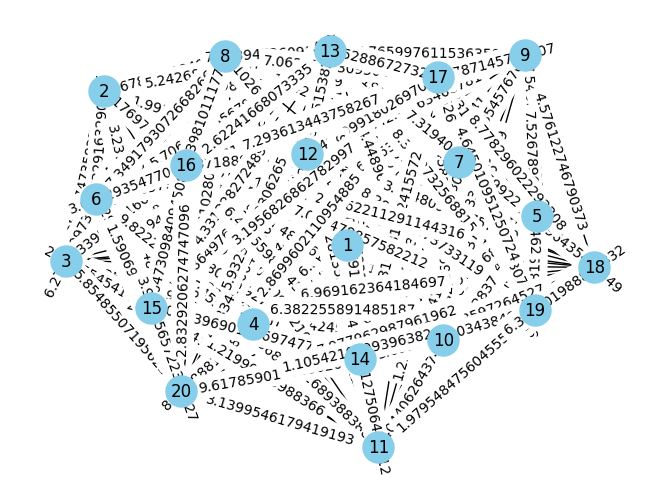

In [132]:
# Visualization
pos = nx.spring_layout(G2, seed=42)
nx.draw(G2, pos, with_labels=True, node_size=500, node_color="skyblue")
labels = nx.get_edge_attributes(G2, 'weight')
nx.draw_networkx_edge_labels(G2, pos, edge_labels=labels)
plt.show()

In [134]:
from tqdm import trange
import torch
import torch.optim as optim
import sys
import pickle

args = {
    "epochs": 100,
    "order": 2,
    "num_neg": 5,
    "dim": 128,
    "batch_size": 10,
    "lr": 0.025,
    "neg_power": 0.75
}
# Create dict of distribution when opening file
edgedistdict, nodedistdict, weights, nodedegrees, maxindex = makeDist(
    G2, args["neg_power"])

edgesaliassampler = VoseAlias(edgedistdict)
nodesaliassampler = VoseAlias(nodedistdict)

batchrange = int(len(edgedistdict) / args["batch_size"])
print(maxindex)
line = LINE(maxindex + 1, embed_dim=args["dim"], order=args["order"])

opt = optim.SGD(line.parameters(), lr=args["lr"],
                    momentum=0.9, nesterov=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

lossdata = {"it": [], "loss": []}
it = 0

print("\nTraining on {}...\n".format(device))
for epoch in range(args["epochs"]):
    print("Epoch {}".format(epoch))
    for b in trange(batchrange):
        samplededges = edgesaliassampler.sample_n(args["batch_size"])
        batch = list(makeData(samplededges, args["num_neg"], weights, nodedegrees,
                                  nodesaliassampler))
        batch = torch.LongTensor(batch)
        v_i = batch[:, 0]
        v_j = batch[:, 1]
        negsamples = batch[:, 2:]
        line.zero_grad()
        loss = line(v_i, v_j, negsamples, device)
        loss.backward()
        opt.step()

        lossdata["loss"].append(loss.item())
        lossdata["it"].append(it)
        it += 1

190it [00:00, 44700.35it/s]


1/2. Building and sorting scaled probabilities for alias table...


100%|██████████| 190/190 [00:00<00:00, 202778.06it/s]


2/2. Building alias table...
1/2. Building and sorting scaled probabilities for alias table...


100%|██████████| 19/19 [00:00<00:00, 79691.78it/s]


2/2. Building alias table...
20

Training on cpu...

Epoch 0


100%|██████████| 19/19 [00:00<00:00, 161.78it/s]


Epoch 1


100%|██████████| 19/19 [00:00<00:00, 466.21it/s]


Epoch 2


100%|██████████| 19/19 [00:00<00:00, 398.86it/s]


Epoch 3


100%|██████████| 19/19 [00:00<00:00, 541.75it/s]


Epoch 4


100%|██████████| 19/19 [00:00<00:00, 558.29it/s]


Epoch 5


100%|██████████| 19/19 [00:00<00:00, 528.48it/s]


Epoch 6


100%|██████████| 19/19 [00:00<00:00, 515.09it/s]


Epoch 7


100%|██████████| 19/19 [00:00<00:00, 375.43it/s]


Epoch 8


100%|██████████| 19/19 [00:00<00:00, 374.30it/s]


Epoch 9


100%|██████████| 19/19 [00:00<00:00, 443.14it/s]


Epoch 10


100%|██████████| 19/19 [00:00<00:00, 439.13it/s]


Epoch 11


100%|██████████| 19/19 [00:00<00:00, 474.62it/s]


Epoch 12


100%|██████████| 19/19 [00:00<00:00, 590.98it/s]


Epoch 13


100%|██████████| 19/19 [00:00<00:00, 476.41it/s]


Epoch 14


100%|██████████| 19/19 [00:00<00:00, 484.13it/s]


Epoch 15


100%|██████████| 19/19 [00:00<00:00, 599.78it/s]


Epoch 16


100%|██████████| 19/19 [00:00<00:00, 673.81it/s]


Epoch 17


100%|██████████| 19/19 [00:00<00:00, 785.47it/s]


Epoch 18


100%|██████████| 19/19 [00:00<00:00, 766.64it/s]


Epoch 19


100%|██████████| 19/19 [00:00<00:00, 826.61it/s]


Epoch 20


100%|██████████| 19/19 [00:00<00:00, 667.46it/s]


Epoch 21


100%|██████████| 19/19 [00:00<00:00, 793.15it/s]


Epoch 22


100%|██████████| 19/19 [00:00<00:00, 686.06it/s]


Epoch 23


100%|██████████| 19/19 [00:00<00:00, 711.71it/s]


Epoch 24


100%|██████████| 19/19 [00:00<00:00, 861.60it/s]


Epoch 25


100%|██████████| 19/19 [00:00<00:00, 780.99it/s]


Epoch 26


100%|██████████| 19/19 [00:00<00:00, 860.36it/s]


Epoch 27


100%|██████████| 19/19 [00:00<00:00, 719.40it/s]


Epoch 28


100%|██████████| 19/19 [00:00<00:00, 665.19it/s]


Epoch 29


100%|██████████| 19/19 [00:00<00:00, 750.98it/s]


Epoch 30


100%|██████████| 19/19 [00:00<00:00, 734.70it/s]


Epoch 31


100%|██████████| 19/19 [00:00<00:00, 726.74it/s]


Epoch 32


100%|██████████| 19/19 [00:00<00:00, 833.19it/s]


Epoch 33


100%|██████████| 19/19 [00:00<00:00, 600.57it/s]


Epoch 34


100%|██████████| 19/19 [00:00<00:00, 318.46it/s]


Epoch 35


100%|██████████| 19/19 [00:00<00:00, 282.12it/s]


Epoch 36


100%|██████████| 19/19 [00:00<00:00, 229.50it/s]


Epoch 37


100%|██████████| 19/19 [00:00<00:00, 388.67it/s]


Epoch 38


100%|██████████| 19/19 [00:00<00:00, 204.30it/s]


Epoch 39


100%|██████████| 19/19 [00:00<00:00, 671.88it/s]


Epoch 40


100%|██████████| 19/19 [00:00<00:00, 366.26it/s]


Epoch 41


100%|██████████| 19/19 [00:00<00:00, 635.74it/s]


Epoch 42


100%|██████████| 19/19 [00:00<00:00, 609.19it/s]


Epoch 43


100%|██████████| 19/19 [00:00<00:00, 252.73it/s]


Epoch 44


100%|██████████| 19/19 [00:00<00:00, 331.58it/s]


Epoch 45


100%|██████████| 19/19 [00:00<00:00, 427.02it/s]


Epoch 46


100%|██████████| 19/19 [00:00<00:00, 461.71it/s]


Epoch 47


100%|██████████| 19/19 [00:00<00:00, 317.18it/s]


Epoch 48


100%|██████████| 19/19 [00:00<00:00, 334.62it/s]


Epoch 49


100%|██████████| 19/19 [00:00<00:00, 608.51it/s]


Epoch 50


100%|██████████| 19/19 [00:00<00:00, 485.87it/s]


Epoch 51


100%|██████████| 19/19 [00:00<00:00, 471.33it/s]


Epoch 52


100%|██████████| 19/19 [00:00<00:00, 559.26it/s]


Epoch 53


100%|██████████| 19/19 [00:00<00:00, 474.89it/s]


Epoch 54


100%|██████████| 19/19 [00:00<00:00, 546.47it/s]


Epoch 55


100%|██████████| 19/19 [00:00<00:00, 582.47it/s]


Epoch 56


100%|██████████| 19/19 [00:00<00:00, 469.52it/s]


Epoch 57


100%|██████████| 19/19 [00:00<00:00, 416.17it/s]


Epoch 58


100%|██████████| 19/19 [00:00<00:00, 786.63it/s]


Epoch 59


100%|██████████| 19/19 [00:00<00:00, 795.25it/s]


Epoch 60


100%|██████████| 19/19 [00:00<00:00, 555.84it/s]


Epoch 61


100%|██████████| 19/19 [00:00<00:00, 560.76it/s]


Epoch 62


100%|██████████| 19/19 [00:00<00:00, 615.52it/s]


Epoch 63


100%|██████████| 19/19 [00:00<00:00, 791.76it/s]


Epoch 64


100%|██████████| 19/19 [00:00<00:00, 747.35it/s]


Epoch 65


100%|██████████| 19/19 [00:00<00:00, 569.53it/s]


Epoch 66


100%|██████████| 19/19 [00:00<00:00, 800.04it/s]


Epoch 67


100%|██████████| 19/19 [00:00<00:00, 714.33it/s]


Epoch 68


100%|██████████| 19/19 [00:00<00:00, 754.36it/s]


Epoch 69


100%|██████████| 19/19 [00:00<00:00, 718.97it/s]


Epoch 70


100%|██████████| 19/19 [00:00<00:00, 750.73it/s]


Epoch 71


100%|██████████| 19/19 [00:00<00:00, 529.84it/s]


Epoch 72


100%|██████████| 19/19 [00:00<00:00, 836.84it/s]


Epoch 73


100%|██████████| 19/19 [00:00<00:00, 736.95it/s]


Epoch 74


100%|██████████| 19/19 [00:00<00:00, 819.95it/s]


Epoch 75


100%|██████████| 19/19 [00:00<00:00, 628.60it/s]


Epoch 76


100%|██████████| 19/19 [00:00<00:00, 763.98it/s]


Epoch 77


100%|██████████| 19/19 [00:00<00:00, 700.80it/s]


Epoch 78


100%|██████████| 19/19 [00:00<00:00, 764.61it/s]


Epoch 79


100%|██████████| 19/19 [00:00<00:00, 655.42it/s]


Epoch 80


100%|██████████| 19/19 [00:00<00:00, 691.94it/s]


Epoch 81


100%|██████████| 19/19 [00:00<00:00, 792.44it/s]


Epoch 82


100%|██████████| 19/19 [00:00<00:00, 872.97it/s]


Epoch 83


100%|██████████| 19/19 [00:00<00:00, 807.53it/s]


Epoch 84


100%|██████████| 19/19 [00:00<00:00, 402.67it/s]


Epoch 85


100%|██████████| 19/19 [00:00<00:00, 463.22it/s]


Epoch 86


100%|██████████| 19/19 [00:00<00:00, 496.57it/s]


Epoch 87


100%|██████████| 19/19 [00:00<00:00, 661.81it/s]


Epoch 88


100%|██████████| 19/19 [00:00<00:00, 592.40it/s]


Epoch 89


100%|██████████| 19/19 [00:00<00:00, 490.65it/s]


Epoch 90


100%|██████████| 19/19 [00:00<00:00, 602.83it/s]


Epoch 91


100%|██████████| 19/19 [00:00<00:00, 491.59it/s]


Epoch 92


100%|██████████| 19/19 [00:00<00:00, 641.87it/s]


Epoch 93


100%|██████████| 19/19 [00:00<00:00, 631.88it/s]


Epoch 94


100%|██████████| 19/19 [00:00<00:00, 490.32it/s]


Epoch 95


100%|██████████| 19/19 [00:00<00:00, 582.42it/s]


Epoch 96


100%|██████████| 19/19 [00:00<00:00, 560.49it/s]


Epoch 97


100%|██████████| 19/19 [00:00<00:00, 601.42it/s]


Epoch 98


100%|██████████| 19/19 [00:00<00:00, 596.04it/s]


Epoch 99


100%|██████████| 19/19 [00:00<00:00, 594.79it/s]
